In [2]:
import numpy as np
import numpy.random as rand
from numpy.linalg import pinv
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
rand.seed(1)
sigma = 0.2
x1 = rand.normal(1, sigma, 5)
x2 = rand.normal(2, sigma, 5)

y = np.zeros_like(x1)

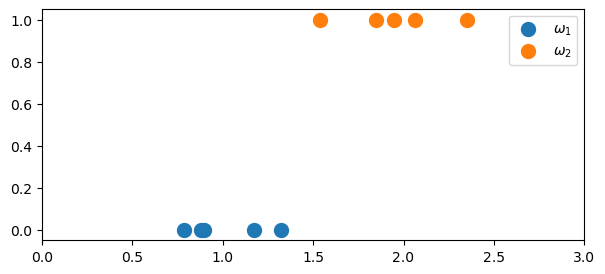

In [4]:
fig = plt.figure(figsize=[7,3])
plt.scatter(x1, y, linewidths=5)
plt.scatter(x2, y+1, linewidths=5)
plt.xlim([0,3])
plt.legend(['$\omega_1$','$\omega_2$'])

In [5]:
X = np.ones([len(x1)+len(x2), 2])
X[:,0] = np.concatenate([x1,x2])
T = np.reshape(np.concatenate([np.zeros_like(x1), np.ones_like(x2)]), [len(x1)+len(x2), 1])
theta = pinv(X.T@X)@X.T@T
ajuste = lambda x: theta[0]*x + theta[1]

In [6]:
x_ajuste = np.linspace(0,3,50)
y_ajuste = ajuste(x_ajuste)

Text(0.5, 0, '$x$')

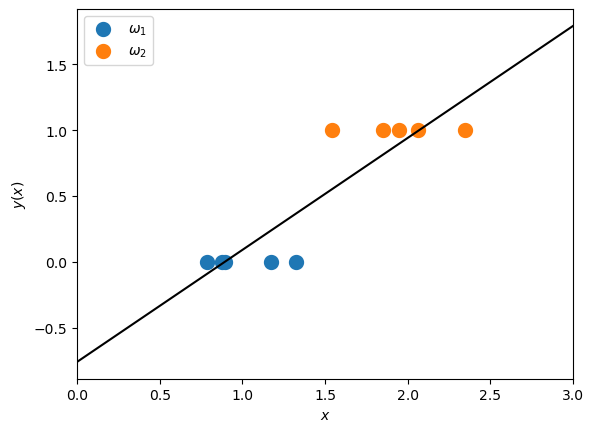

In [7]:
plt.scatter(x1, y, linewidths=5)
plt.scatter(x2, y+1, linewidths=5)
plt.plot(x_ajuste, y_ajuste, 'k')
plt.xlim([0,3])
plt.legend(['$\omega_1$','$\omega_2$'])
plt.ylabel('$y(x)$')
plt.xlabel('$x$')

In [8]:
ajuste(np.sort(x1)[0])

array([-0.09077925])

In [9]:
x3 = rand.normal(3, 0.1, 5)

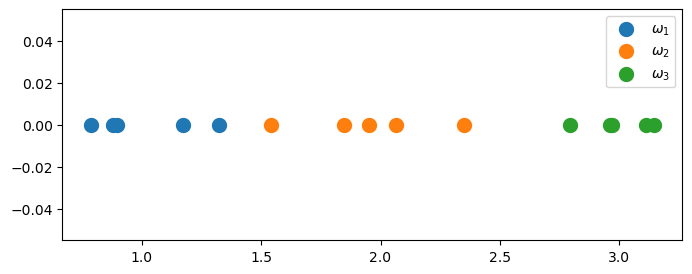

In [10]:
plt.figure(figsize=[8,3])
plt.scatter(x1,y,linewidths=5)
plt.scatter(x2,y,linewidths=5)
plt.scatter(x3,y,linewidths=5)
plt.legend(['$\omega_1$','$\omega_2$','$\omega_3$'])

In [11]:
X = np.ones([len(x1)+len(x2)+len(x3), 2])
X[:,0] = np.concatenate([x1,x2,x3])

T1 = np.reshape(np.concatenate([np.ones_like(x1), np.zeros_like(x2), np.zeros_like(x3)]), [len(x1)+len(x2)+len(x3), 1])
theta1 = pinv(X.T@X)@X.T@T1
ajuste1 = lambda x: theta1[0]*x + theta1[1]

T2 = np.reshape(np.concatenate([np.zeros_like(x1), np.ones_like(x2), np.zeros_like(x3)]), [len(x1)+len(x2)+len(x3), 1])
theta2 = pinv(X.T@X)@X.T@T2
ajuste2 = lambda x: theta2[0]*x + theta2[1]

T3 = np.reshape(np.concatenate([np.zeros_like(x1), np.zeros_like(x2), np.ones_like(x3)]), [len(x1)+len(x2)+len(x3), 1])
theta3 = pinv(X.T@X)@X.T@T3
ajuste3 = lambda x: theta3[0]*x + theta3[1]

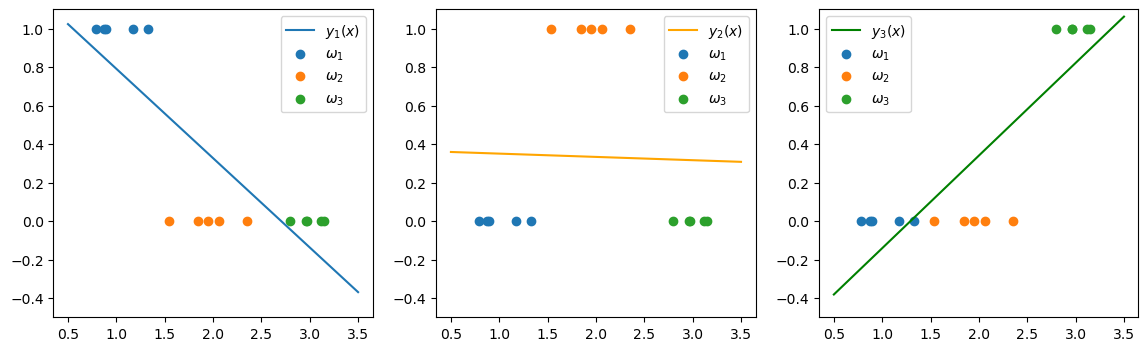

In [12]:
fig, axs = plt.subplots(1,3, figsize=[14,4])

x_ajuste = np.linspace(0.5,3.5,10)
axs[0].plot(x_ajuste, ajuste1(x_ajuste))
axs[0].scatter(x1,y+1)
axs[0].scatter(x2,y)
axs[0].scatter(x3,y)
axs[0].set_ylim([-0.5,1.1])
axs[0].legend(['$y_1(x)$','$\omega_1$','$\omega_2$','$\omega_3$'])

x_ajuste = np.linspace(0.5,3.5,10)
axs[1].plot(x_ajuste, ajuste2(x_ajuste), c='orange')
axs[1].scatter(x1,y)
axs[1].scatter(x2,y+1)
axs[1].scatter(x3,y)
axs[1].set_ylim([-0.5,1.1])
axs[1].legend(['$y_2(x)$','$\omega_1$','$\omega_2$','$\omega_3$'])

x_ajuste = np.linspace(0.5,3.5,10)
axs[2].plot(x_ajuste, ajuste3(x_ajuste), c='green')
axs[2].scatter(x1,y)
axs[2].scatter(x2,y)
axs[2].scatter(x3,y+1)
axs[2].set_ylim([-0.5,1.1])
axs[2].legend(['$y_3(x)$','$\omega_1$','$\omega_2$','$\omega_3$'])

In [13]:
N = 1000
x1 = np.linspace(-10, 10, N)
x2 = np.linspace(-10, 10, N)
X1, X2 = np.meshgrid(x1, x2)

sigma = 1
mu1 = np.array([1, 1])
mu2 = np.array([-1, -1])
gauss1 = stats.multivariate_normal(mean=mu1,
                                   cov=sigma*np.ones(2))
gauss2 = stats.multivariate_normal(mean=mu2,
                                   cov=sigma*np.ones(2))


In [14]:
Z1 = np.zeros_like(X1)
Z2 = np.zeros_like(X1)
for j in range(np.shape(Z1)[1]):
    x = np.concatenate([np.expand_dims(X1[:,j],1), np.expand_dims(X2[:,j], 1)], 1)
    Z1[:, j] = gauss1.pdf(x)
    Z2[:, j] = gauss2.pdf(x)
    

(-3.5, 4.0)

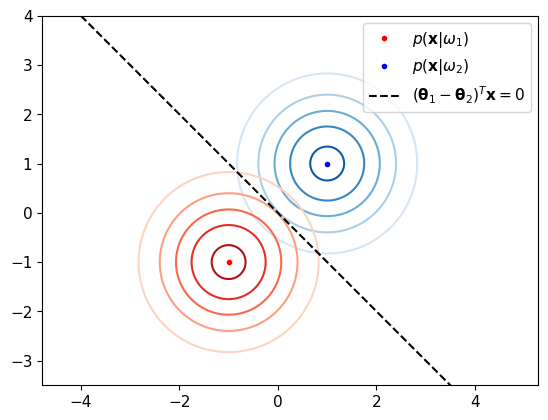

In [32]:
#fig = plt.subplots(3)
plt.contour(X1, X2, Z1, 5, cmap='Blues')
plt.contour(X1, X2, Z2, 5, cmap='Reds')
plt.plot(mu2[0], mu2[1], 'r.')
plt.plot(mu1[0], mu1[0], 'b.')
plt.plot([-4, 4], [4, -4], 'k--')
plt.legend(['$p(\\mathbf{x}|\omega_1)$', '$p(\\mathbf{x}|\omega_2)$',
    '$(\\mathbf{\\theta}_1 - \\mathbf{\\theta}_2)^T \\mathbf{x}=0$'], fontsize=11, loc='upper right')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.axis('equal')
plt.xlim([-2, 2.5])
plt.ylim([-3.5, 4])

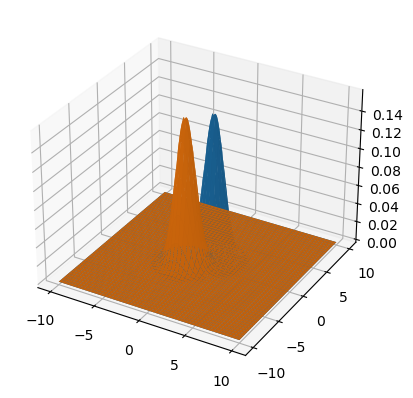

In [16]:
fig, axs = plt.subplots(1, subplot_kw=dict(projection='3d'))
axs.plot_surface(X1, X2, Z1)
axs.plot_surface(X1, X2, Z2)